<a href="https://colab.research.google.com/github/phandat128/Football-player-predict/blob/main/ML_project_gk_position.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('gk_new.csv')
df.head(5)

,name,age,Contract valid until,Overall rating,Potential,Value,Wage,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Long shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive awareness,Standing tackle,Sliding tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,G. Donnarumma,23,2026,88,92,103500000.0,110000.0,12,12,12,36,8,28,12,14,34,30,50,55,64,85,38,59,72,34,72,18,30,26,14,60,24,65,20,14,16,90.0,82.0,79.0,85.0,89.0
1,T. Courtois,30,2026,90,90,79500000.0,250000.0,14,14,13,33,12,13,19,20,35,23,42,52,63,84,45,56,68,38,70,17,23,15,13,44,27,66,20,18,16,85.0,89.0,75.0,90.0,90.0
2,Alisson,29,2027,89,90,79000000.0,190000.0,17,13,29,60,20,27,19,18,58,40,58,49,40,87,37,64,52,32,78,14,27,11,13,66,23,66,15,19,16,86.0,85.0,85.0,90.0,89.0
3,J. Oblak,29,2028,89,90,79000000.0,100000.0,13,11,15,43,13,12,13,14,40,30,42,53,64,86,48,59,77,42,78,12,36,24,11,67,11,68,27,14,18,86.0,90.0,79.0,87.0,89.0
4,Ederson,28,2026,88,90,78000000.0,210000.0,20,14,14,61,18,23,15,20,65,40,64,63,60,87,48,68,66,41,78,18,38,27,20,70,51,70,29,15,8,86.0,82.0,91.0,86.0,86.0


In [ ]:
df = df[['Value', 'Agility', 'Reactions', 'Composure', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']]

In [ ]:
group_df = df.groupby(np.arange(len(df.index))//15, axis=0).mean()

for i in df.index:
  if math.isnan(df.loc[i]['GK Kicking']):
      df.loc[i] = df.loc[i].fillna(group_df.loc[i//15][-5:])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Value           300 non-null    float64
 1   Agility         300 non-null    int64  
 2   Reactions       300 non-null    int64  
 3   Composure       300 non-null    int64  
 4   GK Diving       300 non-null    float64
 5   GK Handling     300 non-null    float64
 6   GK Kicking      300 non-null    float64
 7   GK Positioning  300 non-null    float64
 8   GK Reflexes     300 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 21.2 KB


In [ ]:
df.isnull().sum()

Value             0
Agility           0
Reactions         0
Composure         0
GK Diving         0
GK Handling       0
GK Kicking        0
GK Positioning    0
GK Reflexes       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
numeric_columns = df.select_dtypes('number').columns
for column in numeric_columns:
  if column == 'Value': continue
  df[column] = df[column]/100
df['Value'] = np.log(df['Value'])

In [ ]:
df.describe()

,Value,Agility,Reactions,Composure,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,14.760445,0.417100,0.658000,0.469800,0.737912,0.717562,0.703803,0.728209,0.754701
std,1.414990,0.115214,0.111628,0.136908,0.056711,0.056566,0.061831,0.059314,0.059984
min,12.765688,0.210000,0.380000,0.200000,0.590000,0.580000,0.480000,0.550000,0.600000
25%,13.592367,0.330000,0.580000,0.357500,0.693750,0.673333,0.663333,0.690000,0.700000
50%,14.457364,0.390000,0.670000,0.470000,0.730000,0.715000,0.700000,0.710000,0.740000
75%,15.830414,0.500000,0.740000,0.592500,0.780000,0.760000,0.740000,0.770000,0.800000
max,18.455082,0.690000,0.870000,0.700000,0.900000,0.900000,0.910000,0.900000,0.900000


###Utility function

In [ ]:
def scatterPlotToTarget(columns, target, ncolumns=3):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].scatter(x=df[columns[col_index]], y=df[target])
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
      #correlation
      correlation = df[target].corr(df[columns[col_index]])
      axs[i,j].annotate(f'corr: {correlation}', (0.8, 0.2), xycoords='axes fraction', ha='center', va='center')
  fig.tight_layout()

In [ ]:
def plot_boxplot(columns, title, ncolumns=3):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  fig.suptitle(title)
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].boxplot(x=df[columns[col_index]])
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
  fig.tight_layout()

In [ ]:
# remove outliers
def outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    Lower_fence = Q1 - (1.5*IQR)
    print(f"Lower fence is = {Lower_fence}")

    Higher_fence = Q3 + (1.5*IQR)
    print(f"Higher fence is = {Higher_fence}")


    #With the help of "index" function here we are getting all the indexes of Lower_fence and Higher_fence

    IndexL_Outlier = data[data[column] < Lower_fence ].index
    IndexH_Outlier = data[data[column] > Higher_fence].index

    print(f'\nBEFORE dropping Outlier we have rows = {data.shape[0]}, and columns = {data.shape[1]}')

    data.drop(IndexL_Outlier,inplace=True)
    data.drop(IndexH_Outlier,inplace=True)

    print(f'AFTER dropping Outlier we have rows = {data.shape[0]}, and columns = {data.shape[1]}')

###Next

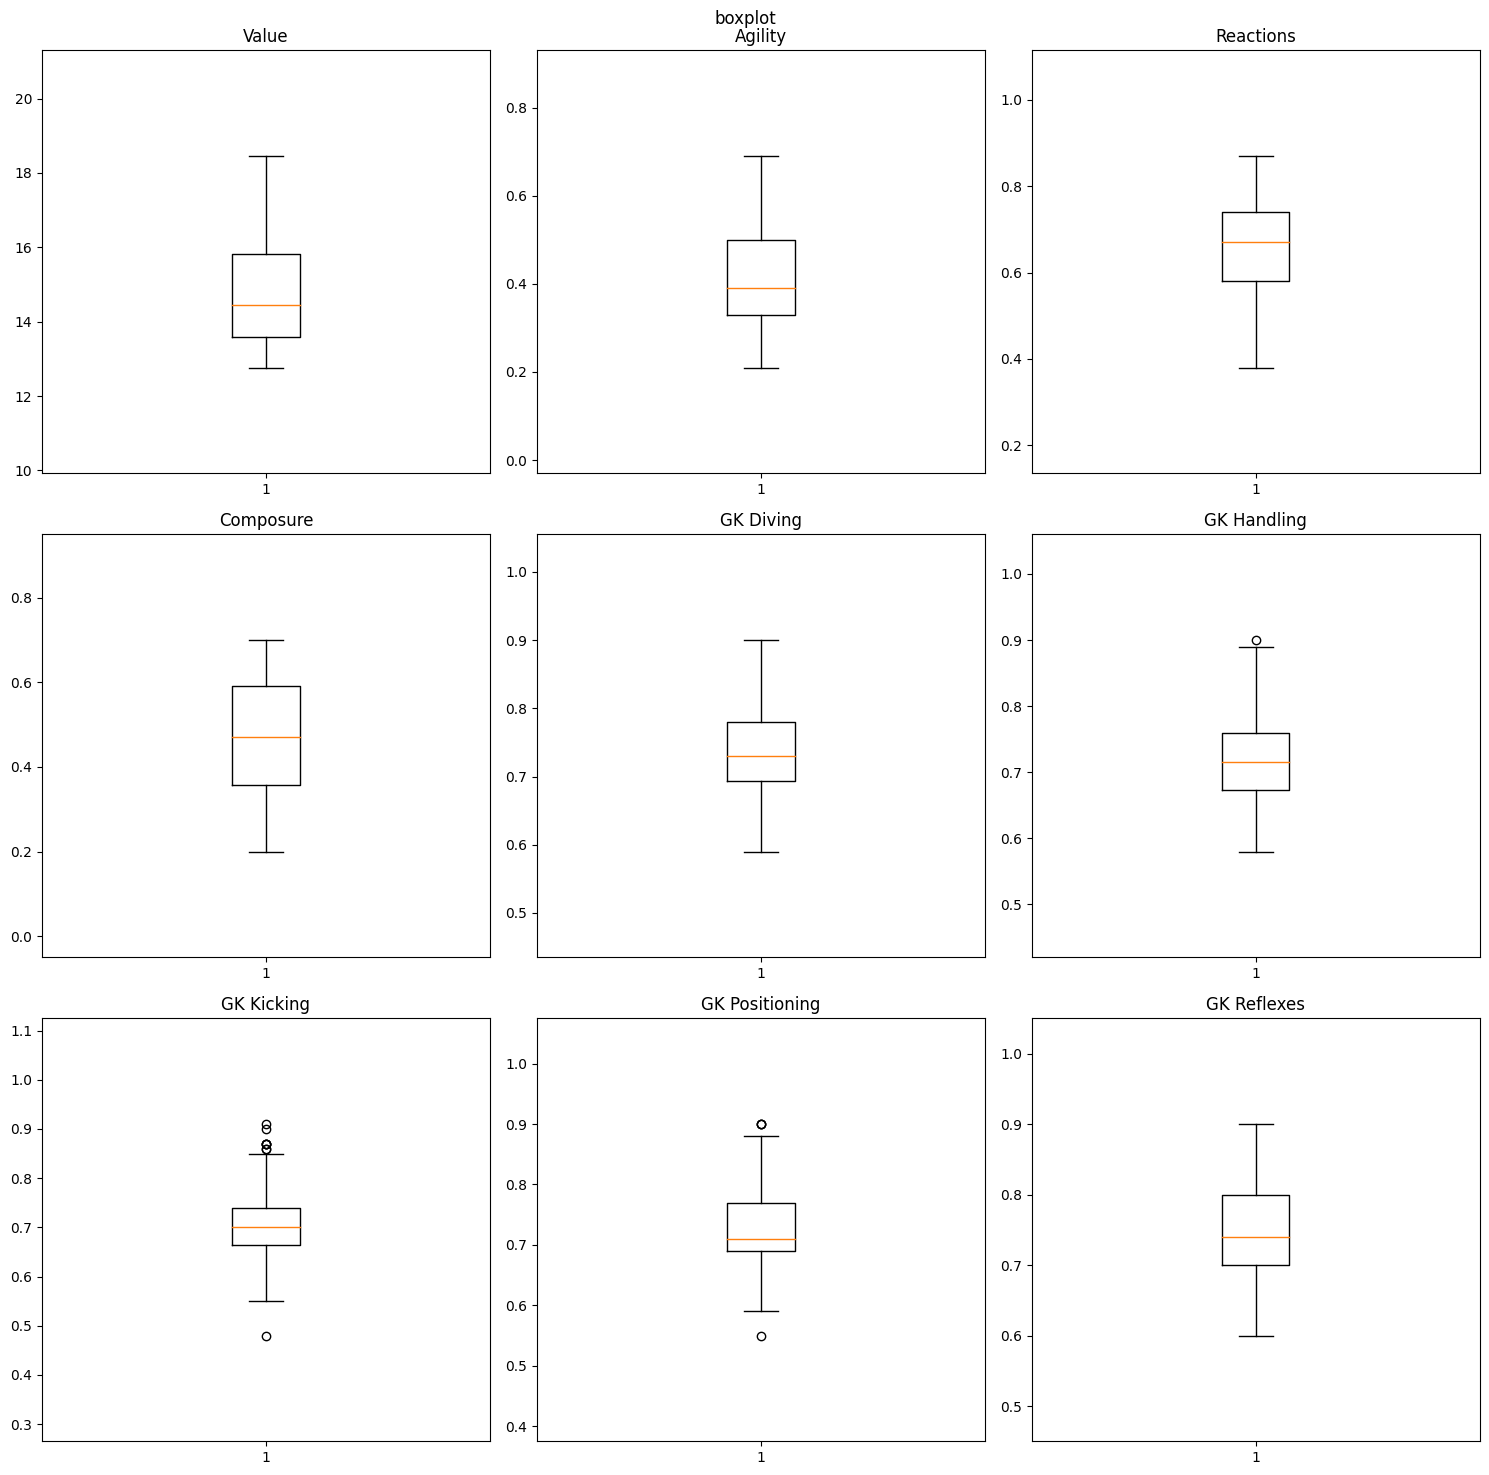

In [ ]:
plot_boxplot(numeric_columns, "boxplot", 3)

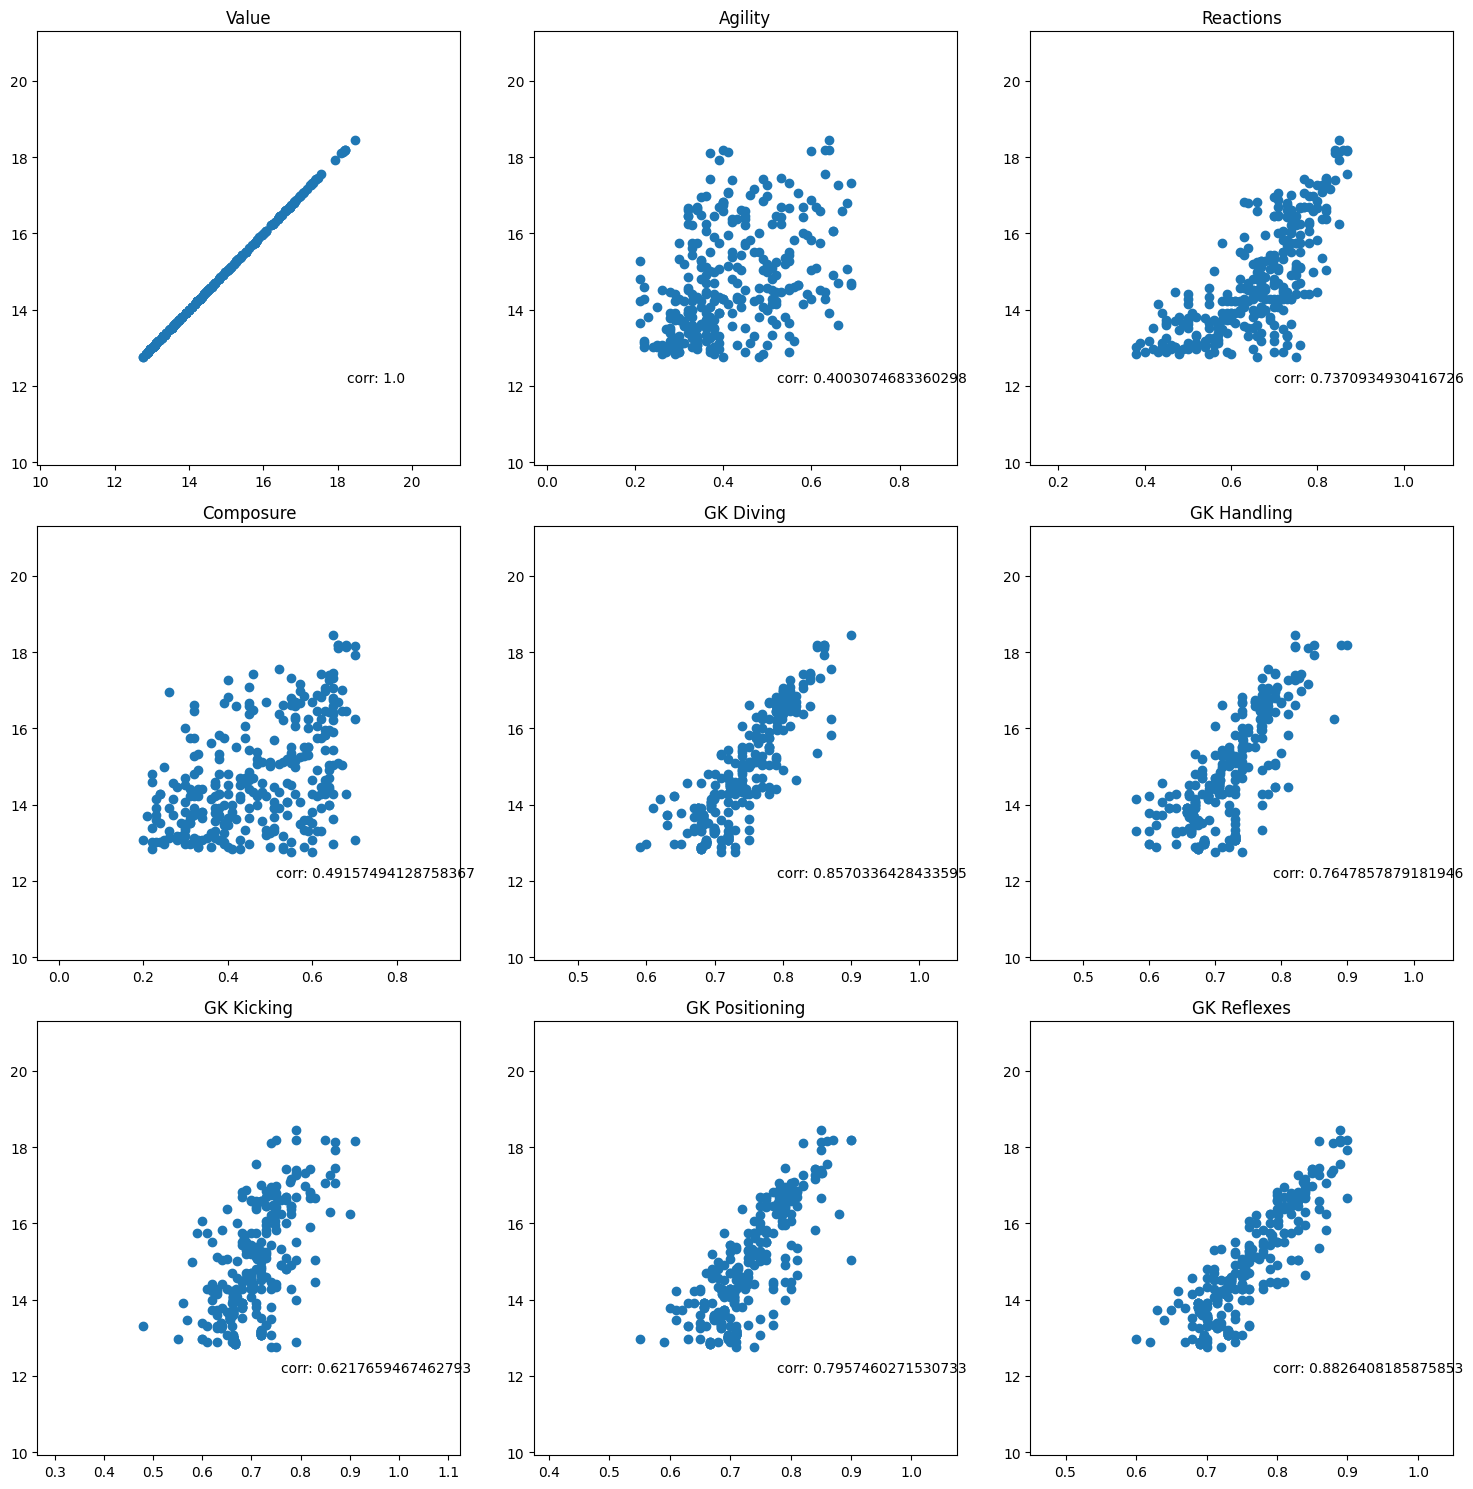

In [ ]:
scatterPlotToTarget(numeric_columns, target='Value', ncolumns=3)

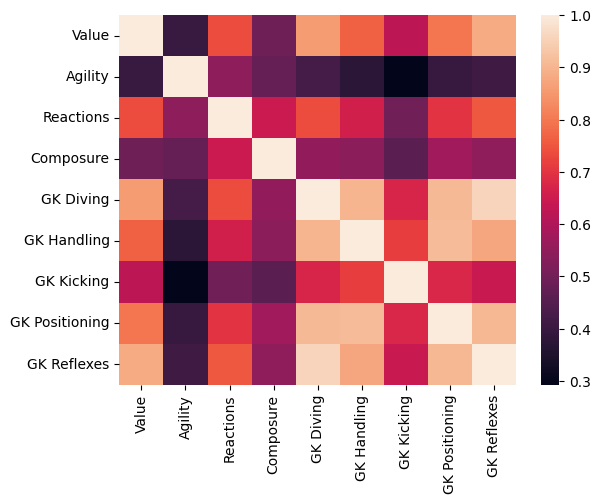

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False)
plt.show()

In [ ]:
correlation_matrix

,Value,Agility,Reactions,Composure,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
Value,1.000000,0.400307,0.737093,0.491575,0.857034,0.764786,0.621766,0.795746,0.882641
Agility,0.400307,1.000000,0.546503,0.480592,0.420921,0.373757,0.292754,0.397188,0.409312
Reactions,0.737093,0.546503,1.000000,0.645157,0.736404,0.658433,0.495175,0.698705,0.752429
Composure,0.491575,0.480592,0.645157,1.000000,0.550705,0.543071,0.458640,0.575465,0.547054
GK Diving,0.857034,0.420921,0.736404,0.550705,1.000000,0.898745,0.671895,0.907580,0.956235
GK Handling,0.764786,0.373757,0.658433,0.543071,0.898745,1.000000,0.712991,0.911712,0.874054
GK Kicking,0.621766,0.292754,0.495175,0.458640,0.671895,0.712991,1.000000,0.676747,0.640898
GK Positioning,0.795746,0.397188,0.698705,0.575465,0.907580,0.911712,0.676747,1.000000,0.904305
GK Reflexes,0.882641,0.409312,0.752429,0.547054,0.956235,0.874054,0.640898,0.904305,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

y = df['Value']
X = df.drop(['Value'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate

models = {
    'linear_regression': LinearRegression(),
    'mlp_model': MLPRegressor((50, 50), activation='relu'),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(100)
}
reg_linear_models = {
    'ridge_regression': Ridge(),
    'lasso_regression': Lasso(),
}

for (model_name, model) in models.items():
  cv_results = cross_validate(model, X_train, y_train, cv=5, return_estimator=True)
  y_pred = [estimator.predict(X_test) for estimator in cv_results['estimator']]
  y_pred = np.average(y_pred, axis=0)
  print(model_name)
  print('MAE: ', mean_absolute_error(y_test, y_pred))
  print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('r2 score: ', r2_score(y_test, y_pred))
  print()

linear_regression
MAE:  0.4599901144648986
RMSE:  0.6284356232858901
r2 score:  0.8044538160980623

mlp_model
MAE:  0.752635441627412
RMSE:  0.9796407448009123
r2 score:  0.5248164102659327

decision_tree
MAE:  0.4299189282813561
RMSE:  0.6296285987398836
r2 score:  0.8037106907522886

random_forest
MAE:  0.35440424859220043
RMSE:  0.5472647766944656
r2 score:  0.8517062840179342



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'ridge_regression': {'alpha': np.arange(0.03, 0.05, 0.001)},
    'lasso_regression': {'alpha': np.arange(0.001, 0.01, 0.0001)}
}

for (model_name, model) in reg_linear_models.items():
  grid_search = GridSearchCV(model, param_grid[model_name], scoring='r2')
  grid_search.fit(X_train, y_train)
  reg_linear_models[model_name] = grid_search.best_estimator_
  reg_linear_models[model_name].fit(X_train, y_train)
  y_pred = reg_linear_models[model_name].predict(X_test)
  print(reg_linear_models[model_name])
  print('MAE: ', mean_absolute_error(y_test, y_pred))
  print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('r2 score: ', r2_score(y_test, y_pred))
  print()

Ridge(alpha=0.04300000000000001)
MAE:  0.4539473053987111
RMSE:  0.6156544840268597
r2 score:  0.8123269775584909

Lasso(alpha=0.004900000000000002)
MAE:  0.4795294915058031
RMSE:  0.6117572451419586
r2 score:  0.8146954866200029



In [ ]:
models['random_forest'].fit(X_train, y_train)
y_pred = models['random_forest'].predict(X_test)
pd.DataFrame(zip(y_test, y_pred), columns=['target', 'predict'])

,target,predict
0,13.815511,13.672945
1,13.071070,13.120424
2,14.403297,15.069929
3,17.466169,16.864998
4,13.527828,13.554128
5,13.592367,13.880470
6,13.910821,13.802335
7,15.096444,15.256847
8,18.132999,18.052811
9,14.220976,14.217504


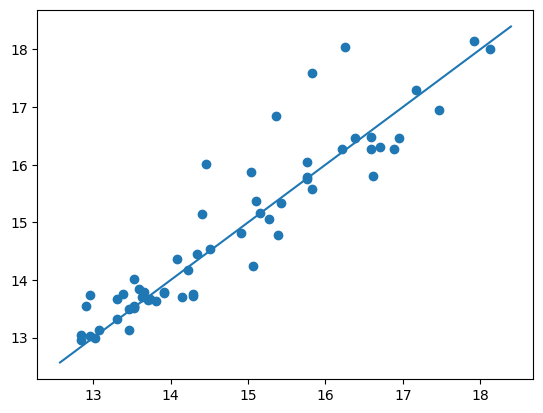

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot(plt.xlim(), plt.xlim())